# Módulo 6 tarefa 1

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esses arquivos.

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
base = pd.read_csv('sinasc_RO_2019.csv')
base.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


####  2) Monte um gráficos de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE.

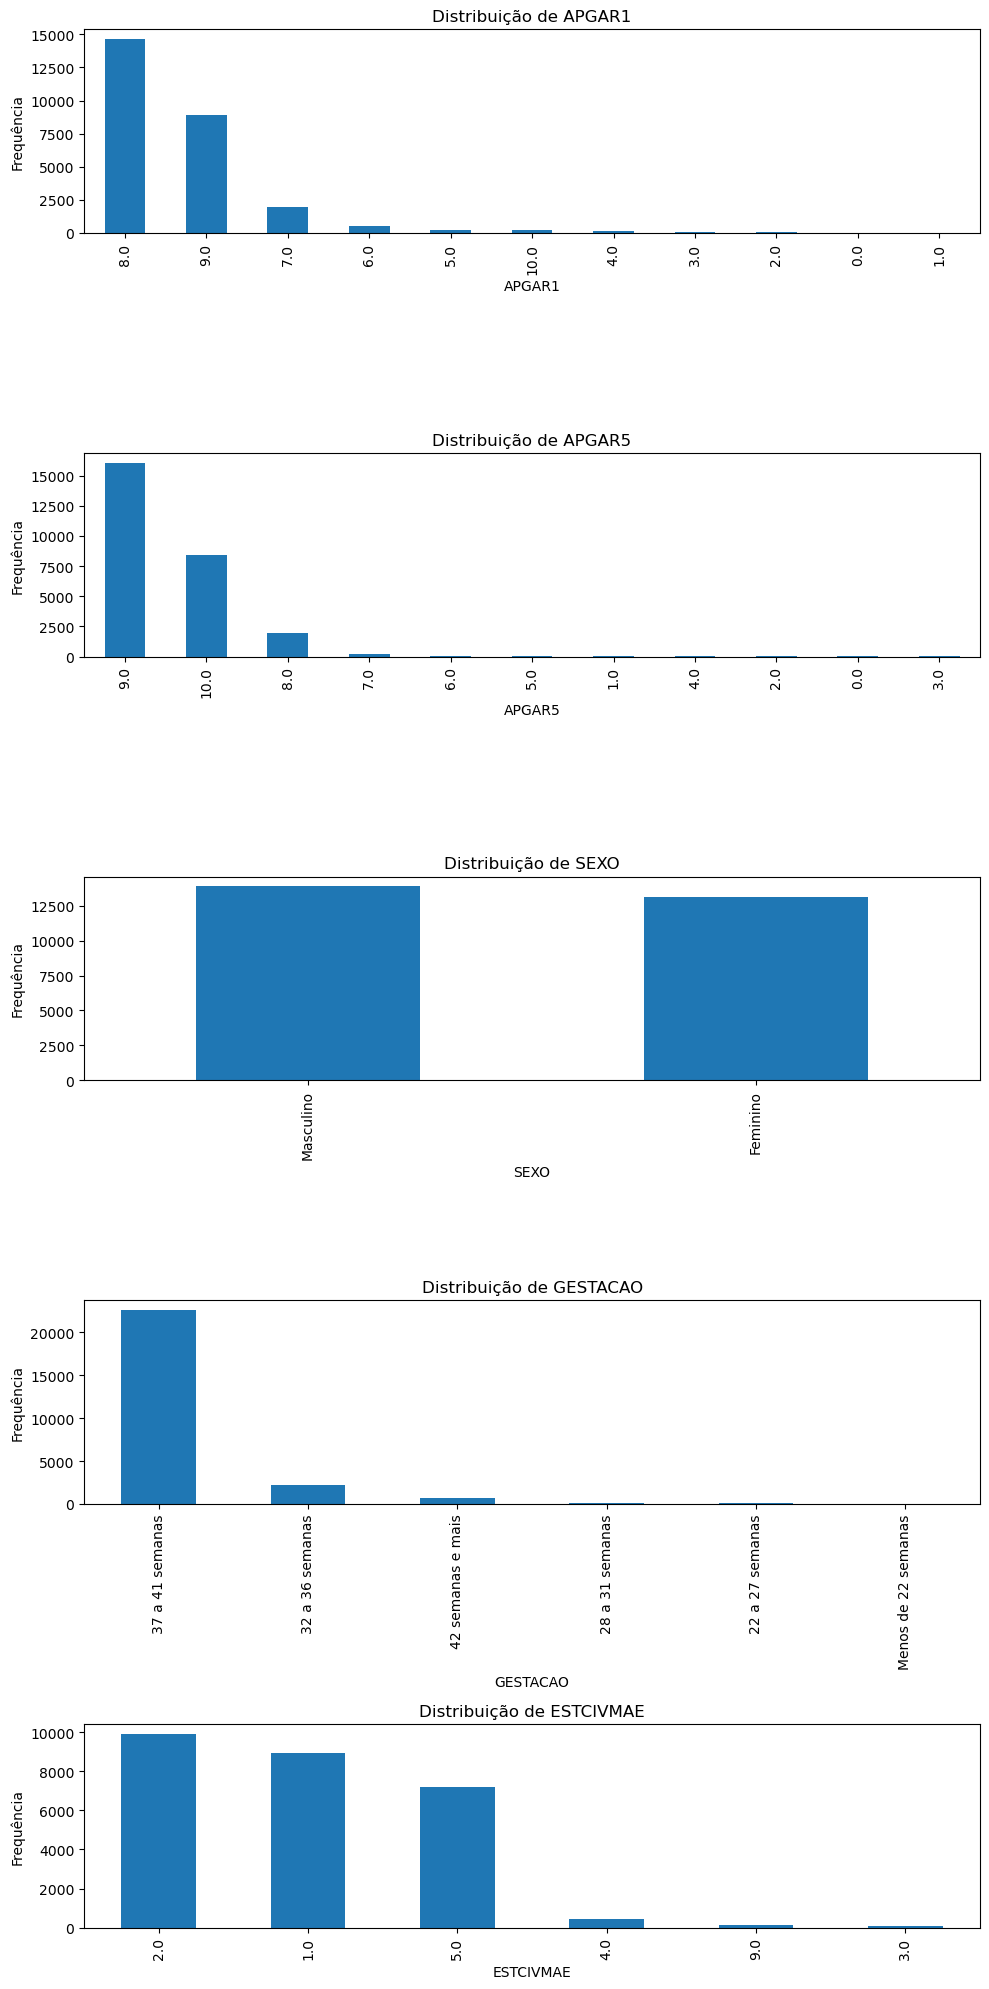

In [14]:
colunas = ['APGAR1', 'APGAR5', 'SEXO', 'GESTACAO', 'ESTCIVMAE']

fig , axes = plt.subplots(nrows=len(colunas), ncols=1, figsize=(10,20))

for i, col in enumerate(colunas):
    base[col].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Distribuição de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequência')

# Ajustar layout para não sobrepor os gráficos
plt.tight_layout()
plt.show()
    

#### 3) Monte um gráfico de barras mostrando o APGAR5 médio por CONSULTAS

<Axes: xlabel='CONSULTAS', ylabel='APGAR5'>

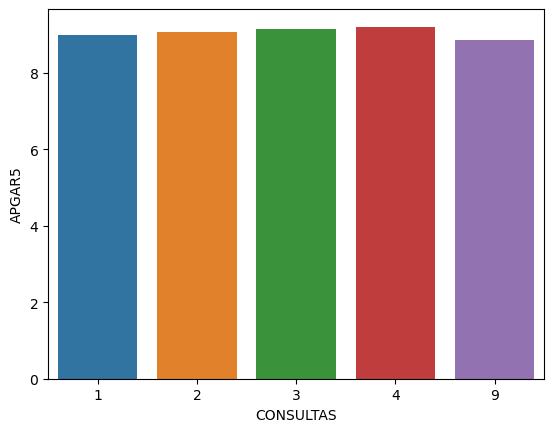

In [15]:
apgMed = base.groupby('CONSULTAS')['APGAR5'].mean().reset_index()
sns.barplot(x='CONSULTAS', y='APGAR5', data=apgMed)

####  4) Monte um painel com 4 gráficos mostrando as frequencias de SEXO, GESTACAO, ESTCIVMAE e CONSULTAS

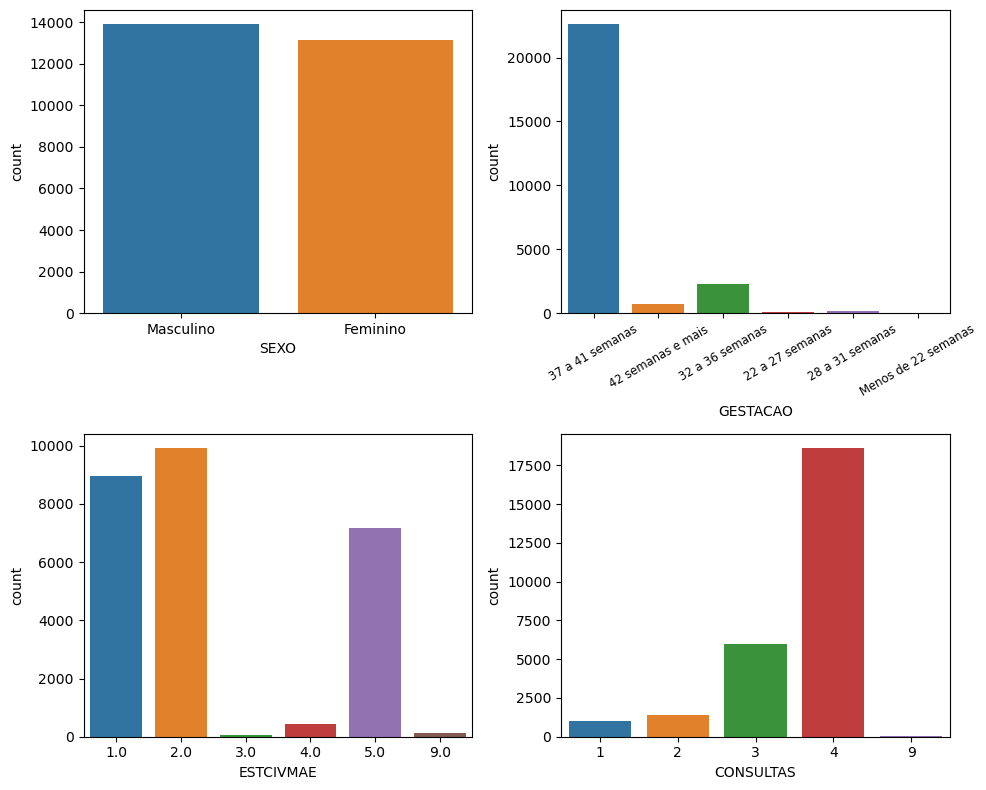

In [31]:
plt.close('all')
plt.rc('figure', figsize=(10, 8))
fig, axes = plt.subplots(2,2)

sns.countplot(ax =axes[0,0], x='SEXO', data=base)
sns.countplot(ax =axes[0,1], x='GESTACAO', data=base)
sns.countplot(ax =axes[1,0], x='ESTCIVMAE', data=base)
sns.countplot(ax =axes[1,1], x='CONSULTAS', data=base)

# Ajustar os rótulos do eixo x do gráfico de GESTACAO
labels = axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=30, fontsize='small')

# Ajustar o espaçamento entre os subplots
plt.tight_layout()


#ajustar o espaçamento
#plt.subplots_adjust(wspace=0, hspace=0)